<a href="https://colab.research.google.com/github/abhay-30/Hangman-Game/blob/main/NSL_KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
!pip install --quiet --upgrade tensorflow-federated

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_federated as tff

import collections
from sklearn.preprocessing import StandardScaler
# Reding data from csv file
df = pd.read_csv('KDDTrain+.txt')


print(df.shape)

(125972, 43)


In [68]:
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [69]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations','num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns


# sanity check
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


#Data Transformation

In [70]:
df.loc[df['attack'] == "normal", "attack"] = 'normal'
df.loc[df['attack'] != 'normal', "attack"] = 'attack'
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,attack,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,attack,21


In [71]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(5, 5), fontsize=5, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

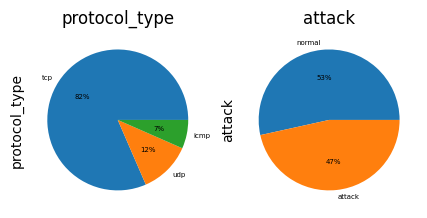

In [72]:
pie_plot(df, ['protocol_type', 'attack'], 1, 2)

# Data Preprocessing

In [73]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['attack']=le.fit_transform(df['attack'])
df.head()



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,1,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,0,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,1,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,0,21


In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
services = df['service']

df = df.drop('service', axis=1)


In [75]:
# first encode the string varibales for standard scaling the data

ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
df=np.array(ct.fit_transform(df))

ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[4])],remainder='passthrough')
df=np.array(ct.fit_transform(df))


print(df)
df.shape


[[0.0 0.0 0.0 ... 0.0 1 15]
 [0.0 0.0 0.0 ... 0.0 0 19]
 [0.0 0.0 0.0 ... 0.01 1 21]
 ...
 [0.0 0.0 0.0 ... 0.0 1 18]
 [0.0 0.0 0.0 ... 0.0 0 20]
 [0.0 0.0 0.0 ... 0.0 1 21]]


(125972, 54)

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
temp = df[:,-2]
scaled_data=sc.fit_transform(df)

scaled_data[:,-2]=temp
print(scaled_data)






[[-0.01911266 -0.31289048 -0.11205026 ... -0.37638873  1.
  -1.96554725]
 [-0.01911266 -0.31289048 -0.11205026 ... -0.37638873  0.
  -0.21996766]
 [-0.01911266 -0.31289048 -0.11205026 ... -0.34508583  1.
   0.65282213]
 ...
 [-0.01911266 -0.31289048 -0.11205026 ... -0.37638873  1.
  -0.65636256]
 [-0.01911266 -0.31289048 -0.11205026 ... -0.37638873  0.
   0.21642723]
 [-0.01911266 -0.31289048 -0.11205026 ... -0.37638873  1.
   0.65282213]]


In [77]:

NUM_EPOCHS = 5
BATCH_SIZE = 20
SHUFFLE_BUFFER = 100
PREFETCH_BUFFER = 10

def preprocess(dataset):

  def batch_format_fn(element):
    """Flatten a batch `pixels` and return the features as an `OrderedDict`."""
    return collections.OrderedDict(
        x=tf.convert_to_tensor(element[:,:-2]),
        y=tf.convert_to_tensor(element[:,53:54])
    )


  return dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER, seed=1).batch(
      BATCH_SIZE).map(batch_format_fn).prefetch(PREFETCH_BUFFER)

In [78]:
import math
client_ids = len(scaled_data)/10000
client_ids=math.ceil(client_ids)
federated_train_data=[]
for i in range(client_ids):
  x_dataset =scaled_data[i:min(i+10000,len(scaled_data)),:]
  dataset = tf.data.Dataset.from_tensor_slices((x_dataset))
  federated_train_data.append(preprocess(dataset))
  i+=100



In [79]:
# dataset = tf.data.Dataset.from_tensor_slices(scaled_data)
print(federated_train_data[0])



<_PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 52), dtype=tf.float64, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))])>


Make federated data

# Model Creation

In [80]:
def create_keras_model():
  return tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(52,)),tf.keras.layers.Dense(1, kernel_initializer='zeros'),tf.keras.layers.Softmax(),
  ])


In [81]:
from tensorflow.python.ops.gen_dataset_ops import prefetch_dataset
def model_fn():
  # We _must_ create a new model here, and _not_ capture it from an external
  # scope. TFF will call this within different graph contexts.
  keras_model = create_keras_model()
  return tff.learning.models.from_keras_model(keras_model, input_spec=federated_train_data[0].element_spec,
         loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [82]:
training_process = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.02),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0))

In [83]:
print(training_process.initialize.type_signature.formatted_representation())

( -> <
  global_model_weights=<
    trainable=<
      float32[52,1],
      float32[1]
    >,
    non_trainable=<>
  >,
  distributor=<>,
  client_work=<>,
  aggregator=<
    value_sum_process=<>,
    weight_sum_process=<>
  >,
  finalizer=<
    int64,
    float32[52,1],
    float32[1]
  >
>@SERVER)


In [84]:
train_state = training_process.initialize()

In [85]:
print(train_state)

LearningAlgorithmState(global_model_weights=ModelWeights(trainable=[array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32), array([0.], dtype=float32)], non_trainable=[]), distributor=(), client_work=(), aggregator=OrderedDict([('value_sum_process', ()), ('weight_sum_process', ())]), finalizer=[0, array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [86]:
result = training_process.next(train_state, federated_train_data)
train_state = result.state
train_metrics = result.metrics
print('round  1, metrics={}'.format(train_metrics))

_InactiveRpcError: ignored

In [ ]:
NUM_ROUNDS = 11
for round_num in range(2, NUM_ROUNDS):
  result = training_process.next(train_state, federated_train_data)
  train_state = result.state
  train_metrics = result.metrics
  print('round {:2d}, metrics={}'.format(round_num, train_metrics))